In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import theano
import theano.tensor as T
from utils import optimizers

In [2]:
# Constants
X0 = -.5
Y0 = -3.
STR_XY = "iter: {0:2d}, cost = {1:.2f}, (x, y) = ({2:5.2f}, {3:5.2f})"

In [3]:
# PARAMETERS
# naive guess of the minimum location
x = theano.shared(X0, name='x')
y = theano.shared(Y0, name='y')

In [4]:
# COST FUNCTION
# pick quadratic for simple example/debugging,
# Rosen's function for more interesting convergence analysis

# global minimum = (0, 0)
quad = x**2 + y**2

# global minimum = (1, 1)
rosen = (1 - x)**2 + 100. * (y - x**2)**2

# pick the cost function.
cost = rosen

In [5]:
# OPTIMIZER
# pick the optimization method and some meta parameters
eta = 0.05
opt_sgd = optimizers.sgd(cost, [x, y], learning_rate=eta)
opt_rmsprop = optimizers.rmsprop(cost, [x, y], learning_rate=eta)
opt_adagrad = optimizers.adagrad(cost, [x, y], learning_rate=eta)
opt_adam = optimizers.adam(cost, [x, y], learning_rate=eta)

In [6]:
# OPTIMIZE FUNCTION
# Given the following:
# - cost function,
# - parameters to the cost function,
# - an optimizer
# Return an array with shape (n_iter + 1, 3)
# Whose columns represent cost, x, and y
NUM_ITER = 1000

def optimize(cost, x, y, updates):
    f_cost = theano.function([], cost)
    train = theano.function(
        inputs=[],
        outputs=cost,
        updates=updates)
    
    cost_x_y = np.zeros((NUM_ITER + 1, 3))
    cost_x_y[0, 0] = float(f_cost())
    cost_x_y[0, 1] = float(x.get_value())
    cost_x_y[0, 2] = float(y.get_value())
    
    for epoch in range(NUM_ITER):
        train()
        cost_x_y[epoch + 1, 0] = float(f_cost())
        cost_x_y[epoch + 1, 1] = float(x.get_value())
        cost_x_y[epoch + 1, 2] = float(y.get_value())
        
    return cost_x_y

In [7]:
# USE EACH OPTIMIZER
plot_data = []
for opt in [opt_sgd, opt_rmsprop, opt_adagrad, opt_adam]:
    x.set_value(X0)
    y.set_value(Y0)
    plot_data.append(
        optimize(cost, x, y, opt, )
    )

In [8]:
# PREPARING COST FUNCTION'S LEVEL CURVES
x_grid = np.arange(-5.0, 5.0, 0.05)
y_grid = np.arange(-5.0, 5.0, 0.05)
X, Y = np.meshgrid(x_grid, y_grid)
#Z = X**2 + Y**2
Z = (1 - X)**2 + 100. * (Y - X**2)**2

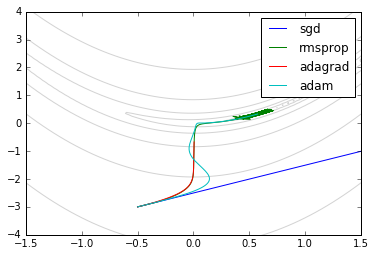

In [9]:
# PLOT
# plot the evolution of the minimum estimate
# together with the functions level curves
%matplotlib inline
fig = plt.figure()
plt.axes(xlim=(-1.5, 1.5), ylim=(-4, 4))

plt.contour(X, Y, Z,
           colors='lightgray', levels=np.logspace(-1, 4, 8))

handlers = []
for data, name in zip(plot_data, ['sgd', 'rmsprop', 'adagrad', 'adam']):
    line, = plt.plot(data[:, 1], data[:, 2], '-', label=name)
    handlers.append(line)

plt.legend(handles=handlers) 
plt.show()